In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [416]:
results = pd.read_csv('threshold-results.csv', header=None)

results.columns = [
    'method', 'run',
    *[f'{i}' for i in range(0, 50, 1)]
]

results['method'] = results['method'].str \
    .replace('pos_ratio:', '') \
    .replace('-pos:.*', '', regex=True)

In [418]:
results = results.loc[results['method'].isin(['0.5%', '1%', '2%', '5%', '20%', '40%', '60%', '80%'])]

In [419]:
data = { 'method': [], 'epoch': [], 'threshold': [], 'run': [], 'col': [] }

for (idx, row) in results.iterrows():
    method = row[0]
    run = row[1]
    col = 'low' if method in ['0.5%', '1%', '2%', '5%'] else 'high'
    for epoch, val in enumerate(row[2:]):
        data['method'].append(method)
        data['epoch'].append(epoch)
        data['threshold'].append(val)
        data['run'].append(run)
        data['col'].append(col)
        
data = pd.DataFrame(data)     

In [420]:
data.method.value_counts()

80%     500
20%     500
40%     500
5%      500
60%     500
0.5%    100
2%       50
Name: method, dtype: int64

In [421]:
plt.style.use(['ggplot', 'seaborn-whitegrid'])

In [422]:
plt.rcParams.clear()
params = {
    'figure.titlesize': 22,
    'figure.figsize': (18, 6),
    'legend.fontsize': 20,
    'font.size': 20,
    'legend.frameon': True,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.markersize': 8,
    'legend.markerscale': 1.5,
    'axes.labelpad': 10,
    'legend.loc': 'upper left'
}
plt.rcParams.update(params)

In [423]:
data.loc[data.col == 'low', 'col'] = 'Priors < 10%'
data.loc[data.col == 'high', 'col'] = 'Priors >= 10%'
data.sort_values(by='method', inplace=True)
data.rename(columns={ 'method': 'Positive\n  Prior' }, inplace=True)

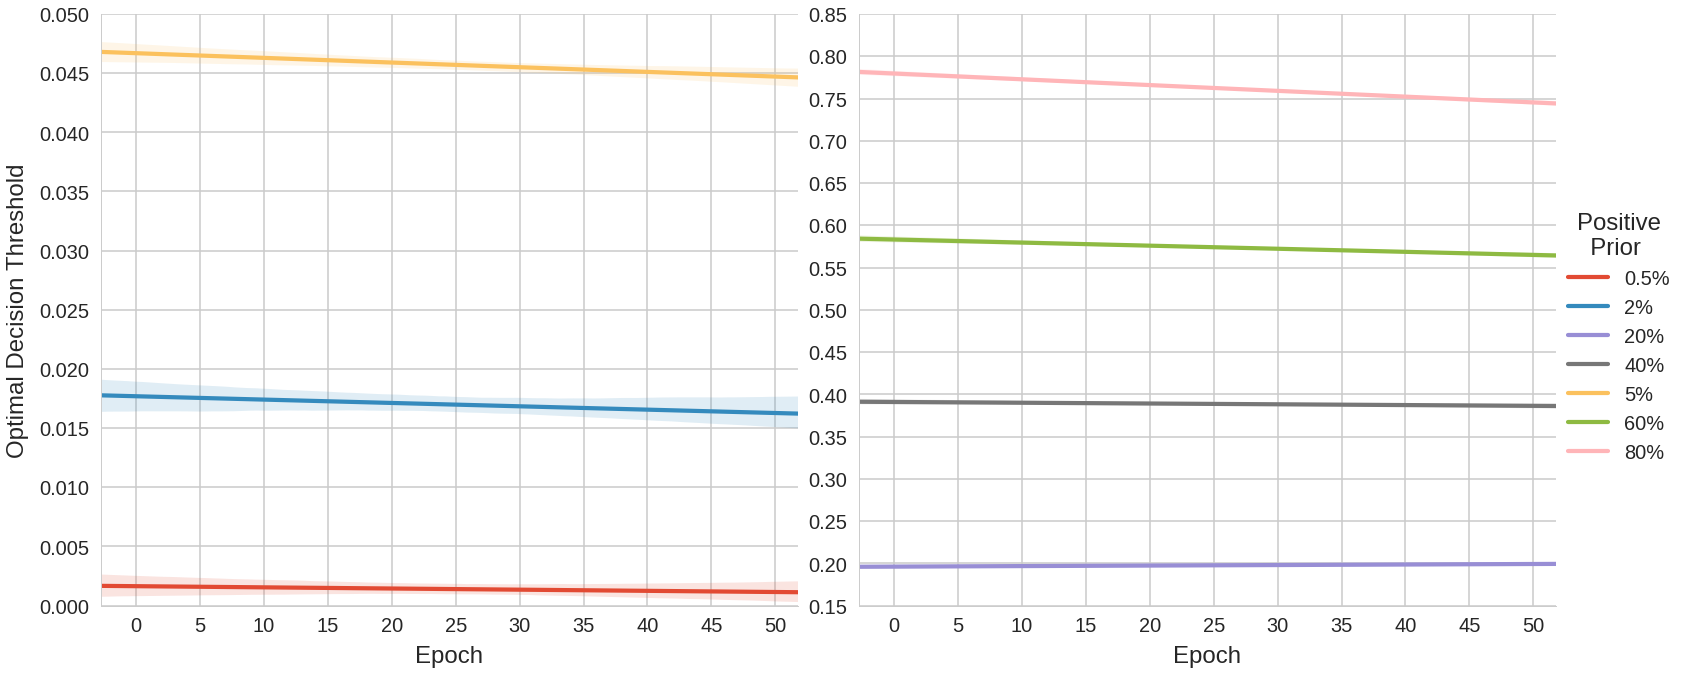

In [427]:
l1 = sns.lmplot(
    data=data, x='epoch', y='threshold', hue='Positive\n  Prior', col='col', col_order=['Priors < 10%', 'Priors >= 10%'],
    ci=95, scatter=False, height=10, aspect=1.1, sharey=False, legend_out=True)

axes = l1.axes
ax1, ax2 = axes[0]
ax1.set_xticks(np.arange(0, 51, 5));
ax1.set_ylim(0, 0.05);
ax1.set_yticks(np.arange(0.0, 0.051, 0.005))
ax2.set_yticks(np.arange(0.15, 0.9, 0.05))


l1.set_titles('');
l1.set_ylabels('Optimal Decision Threshold');
l1.set_xlabels('Epoch');

l1.set_titles('');

l1.savefig('ecbdl-optimal-thresholds.png')

In [428]:
%ls

ecbdl-optimal-thresholds.png  group2/  threshold-results.csv
group1/                       group3/  Untitled.ipynb


In [429]:
results.loc[results.method == '0.5%']

,method,run,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
101,0.5%,0,0.0,0.0,0.005,0.005,0.005,0.005,0.0,0.005,...,0.005,0.0,0.0,0.005,0.0,0.005,0.0,0.005,0.005,0.0
102,0.5%,1,0.0,0.0,0.005,0.000,0.000,0.000,0.0,0.000,...,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.0
